In [ ]:
"""
DAT-129 Spring 2020
Final Project
Zach Trozenski (zachary.trozenski)
"""

import json
import matplotlib.pyplot as plt
import pandas as pd
import requests
import csv

"""
With this final project I wanted to query all the available data from the MAAS API
to get a full dataset of collected martian weather.

Once the data was collected, I wanted to convert it to a dataframe and
to write it out to file which others can tinker (and so that I don't overtax the 
API call limits).

For my own use I'm reading the newly created csv file in and doing some cleaning and
manipulation with the data. Then I'm graphing some interesting fields and writing those
out to be saved in this repo.

Used the following modules from class to construct my code:
    - API (requests)
    - Json objects
    - Pandas
    - Matplotlib
"""


# Assign API URL to a variable
mars_url = "https://api.maas2.apollorion.com"

## Initialize a json list to contain all the json objects queried from the API
json_list = []

# intiating a call to request all available data from the API
for sol in range(0,2667):
    data = requests.get(mars_url + "/" + str(sol) + "/")
    
    # Concatenated lines because I didn't need the 'json_obj' variable anymore
    # since the list is what is going to store all the data and wanted to
    # attempt chaining.
    
    json_list.append(json.loads(data.text))
    
    """
    This part took me a long time to figure out since it's not intuitive at 
    first glance. The json object the API returns is just one object which 
    can't be loaded into the DataFrame.from_dict() method with automatic 
    recognition because it's a scalar (single) value. The only way it can be 
    converted to a dataframe with this method is if an index is given, however
    this means that the header row is transposed to be row headers, which won't
    work for writing to a csv and further pandas manipulation.
    What I figured out was that I needed to have whatever object was passed to
    the from_dict() method would be multiple values, so the dictionary's key
    values could become the column headers. I solved this by initiating and
    empty list and appending all queried json objects from the API to the list.
    The from_dict() method then is able to automatically convert the list of 
    json objects (dictionary type) to a dataframe.
    """
dataframe = pd.DataFrame.from_dict(json_list) 

## Check to see what happens
#print(dataframe.head())

In [45]:
"""
Write the dataframe to a csv file to be used later
Purpose is to not have to query the API constantly for all this data

Variables explained:
    # Using absolute path to write to the same directory containing Jupyter Notebook
    # Don't need an index so the variable is false
    # Representing missing data as 'NaN' since pandas has built in tools to handle these
    # Setting any floats to only have 2 points after the decimal
"""

dataframe.to_csv('/Users/zack/dat129_ccac/Homework/final_project/martian_weather.csv', 
                 index=False, 
                 na_rep='NaN', 
                 float_format='%.2f')

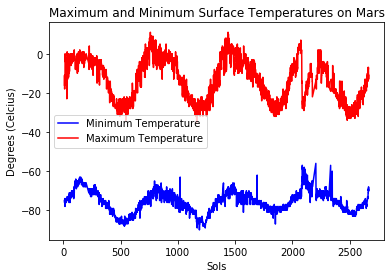

In [72]:
"""
Loading the csv and doing some initial clean up and establishing some
smaller series to clean and use to plot.
"""

# Load dataframe from the csv to be manipulated and edited
weather_df = pd.read_csv('martian_weather.csv')

## check to see what happens
#weather_df.head()

## checking datatype for status column
#print(weather_df['status'].dtype)

## using the loc in combination with a lambda to remove rows 
## that returned 404 request status
clean_weather = weather_df.loc[lambda weather_df: weather_df['status']!=404]

## check to see if it worked
#clean_weather.head()

## Dropping the indexes that do not contain an entry for either
## min_temp or max_temp and assigning them to new variables to graph
clean_min = clean_weather['min_temp'].dropna()
#print(type(clean_min))
clean_max = clean_weather['max_temp'].dropna()

## Making a graph to plot the minimum and maximum observed temperatures
## over time (sols) and saving the output to a png.

plt.plot(clean_min, label="Minimum Temperature", color='blue')
plt.plot(clean_max, label="Maximum Temperature", color='red')
plt.legend(loc='best')
plt.xlabel("Sols")
plt.ylabel("Degrees (Celcius)")
plt.title("Maximum and Minimum Surface Temperatures on Mars")
plt.savefig('max_min_temp_plot.png')
plt.show()

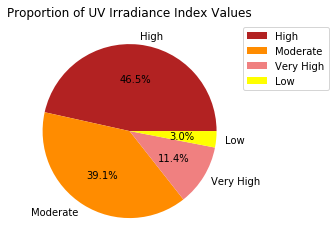

In [71]:
## isolating data on uv irradiance to plot via matplotlib

## cleaning the data first to avoid creating an NaN bin
irradiance_clean = clean_weather['local_uv_irradiance_index'].dropna()
## Taking the value counts of each of the types of uv iradiance and
## converting the series into a dataframe of its own
sum_irradiance = pd.DataFrame(irradiance_clean.value_counts())

## Creating a list to use as labels
## Only these 4 index values were used
labels = ['High', 'Moderate', 'Very High', 'Low']

## Check to see if it worked
#sum_irradiance.head()

## Using a pie chart to indicate the proportion each index value
## has of the whole dataset and saving the output as a png
plt.pie(sum_irradiance['local_uv_irradiance_index'], labels=labels, autopct='%1.1f%%', colors=['firebrick', "darkorange", "lightcoral", "Yellow"])
plt.legend(bbox_to_anchor=(1,1))
plt.title("Proportion of UV Irradiance Index Values")
plt.savefig("irradiance_proportions.png")
plt.show()

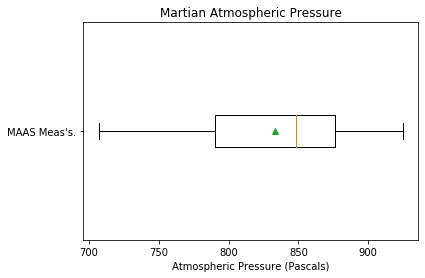

In [269]:
## Finally cleaning the atmospheric pressure data and
## creating a boxplot to show the mean (triangle), 
## median (orange line), max, min, and IQR
## This is also saved out to a png file

#print(clean_weather.dtypes)
pressure = clean_weather['pressure'].dropna()

plt.boxplot(pressure, vert=False, labels=["MAAS Meas's."], showmeans=True)
plt.xlabel('Atmospheric Pressure (Pascals)')
plt.title('Martian Atmospheric Pressure')
plt.savefig("atmospheric_press_boxplot.png")
plt.show()

In [ ]:
### SCRATCH ###

"""
This section contains ideas and scratch work I toyed with when looking for 
portions of the data set to analyze.

Most of this was dead ends or things that I would like to explore when I'm
more well versed with the tools. One of the things that I was hampered by was
this API not having a ton of data points to use.

I tried to plot sunrise and sunset times in various ways but ended up over my
head and terribly confused. Hopefully this is something that I can explore in the future.
"""
# import datetime
# import numpy as np
# #print(clean_weather.dtypes)
# #clean_weather['wind_speed'].dropna()
# #clean_weather['sunrise'].dropna()
# hours = []
# minutes = []
# times = []

# time_fix = [515, 545, 600, 615, 645]
# time_array = np.array(time_fix)

# for x in range(0, 2400, 100):
#     hours.append(x)
    
# for y in range(0, 60, 15):
#     minutes.append(y)
    
# for h in hours:
#     for m in minutes:
#         times.append(h + m)

# for t in times:
#     t = int(t)


# #print(time_array)
    
# sunrise = clean_weather['sunrise'].str.replace(':','').str.replace('^0','').astype(int)
# sunset = clean_weather['sunset'].str.replace(':','').astype(int)

# sunrise_df = sunrise.dropna().value_counts()

# #plt.boxplot(sunrise, vert=False)#, label='Sunrise')
# #plt.plot(sunset, label='Sunset')
# #plt.show()


# sunrise_df.head()
# sunrise_df = sunrise.to_frame()
# sunrise_df['sunrise'].value_counts()
# #sunrise_df = pd.DataFrame(sunrise.sum(), columns=['sum'])

# plt.scatter(sunrise_df['sunrise'], time_fix)
# plt.show()
# #plt.plot(sunrise_df)#, bins=5)
# # plt.plot_date(sunrise, time_array, xdate=True, ydate=True)
# # plt.xticks(time_array, labels=time_fix)
# # plt.show()
# #print(clean_weather['sunrise'].dtypes)